# Assignment 2.2: Convolutional Neural Network
Student Name 1: Miguel Pérez

Student Name 2: David Burrel

Student Name 3: Ignacio Martínez

## German Traffic Sign Benchmark

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip "/content/drive/My Drive/FullIJCNN2013.zip"

Archive:  /content/drive/My Drive/FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00/00000.ppm  
  inflating: FullIJCNN2013/00/00001.ppm  
  inflating: FullIJCNN2013/00/00002.ppm  
  inflating: FullIJCNN2013/00/00003.ppm  
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN2013/00009.ppm  
  inflating: FullIJCNN2013/00010.ppm  
  inflating: FullIJCNN2013/00011.ppm  
  inflating: FullIJCNN2013/00012.ppm  
  inflating: FullIJCNN2013/00013.ppm  
  inflating: FullIJCNN2013/00014.ppm  
  inflating: FullIJCNN2013/00015.ppm  
  inflating: FullIJCNN2013/00016.ppm  
  inflating: FullIJCNN2013/00017.ppm  
  inflating: FullIJ

In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [0]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('/content/FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('/content/FullIJCNN2013', range(600,900), range(852,1213))
len(train_signs)

852

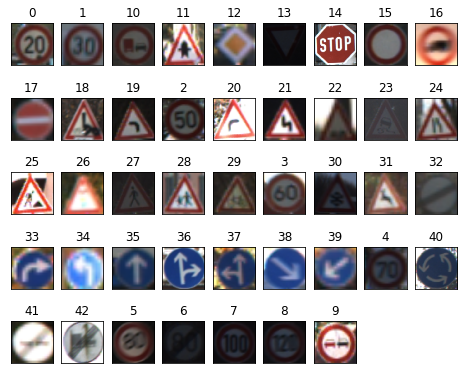

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600]
va_signs = np.array(train_signs)[600:852]
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

len(tr_signs)

Using TensorFlow backend.


600

**Modifying AlexNet**

Model A

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

input_shape = (SIGN_SIZE[0], SIGN_SIZE[1], 3)

#Instantiate an empty model
cnn_a = Sequential()

# 1st Convolutional Layer
cnn_a.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding="valid"))
cnn_a.add(Activation("relu"))
# Max Pooling
cnn_a.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
cnn_a.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="valid"))
cnn_a.add(Activation("relu"))
# Max Pooling
cnn_a.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
cnn_a.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
cnn_a.add(Activation("relu"))

# 4th Convolutional Layer
cnn_a.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
cnn_a.add(Activation("relu"))

# Passing it to a Fully Connected layer
cnn_a.add(Flatten())
# 1st Fully Connected Layer
cnn_a.add(Dense(512, input_shape=input_shape))
cnn_a.add(Activation("relu"))
# Add Dropout to prevent overfitting
cnn_a.add(Dropout(0.8))

# Output Layer
cnn_a.add(Dense(num_classes))
cnn_a.add(Activation("softmax"))

cnn_a.summary()
from keras.optimizers import SGD
# Compile the model
lr = 0.0075
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
cnn_a.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 23, 23, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         


In [0]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

data_a = cnn_a.fit(tr_signs, tr_labels,
               batch_size=150,
               epochs=200,
               verbose=2,
               validation_data=(va_signs, va_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 600 samples, validate on 252 samples
Epoch 1/200





 - 18s - loss: 3.7621 - acc: 0.0350 - val_loss: 3.7389 - val_acc: 0.1032
Epoch 2/200
 - 1s - loss: 3.7281 - acc: 0.0533 - val_loss: 3.6817 - val_acc: 0.0595
Epoch 3/200
 - 1s - loss: 3.6624 - acc: 0.0717 - val_loss: 3.5253 - val_acc: 0.0595
Epoch 4/200
 - 1s - loss: 3.6299 - acc: 0.0750 - val_loss: 3.4696 - val_acc: 0.0595
Epoch 5/200
 - 1s - loss: 3.5939 - acc: 0.0717 - val_loss: 3.4964 - val_acc: 0.1825
Epoch 6/200
 - 1s - loss: 3.5707 - acc: 0.0700 - val_loss: 3.4739 - val_acc: 0.1984
Epoch 7/200
 - 1s - loss: 3.5526 - acc: 0.0750 - val_loss: 3.4550 - val_acc: 0.1190
Epoch 8/200
 - 1s - loss: 3.5320 - acc: 0.0883 - val_loss: 3.4411 - val_acc: 0.1349
Epoch 9/200
 - 1s - loss: 3.4951 - acc: 0.1033 - val_loss: 3.3866 - val_acc: 0.1270
Epoch 10/200
 - 1s - loss: 3.4583 - acc: 0.1083 - val_loss: 3.3031 - val_acc: 0.1905
Epoch 11/2

In [0]:
start = time()
loss, acc = cnn_a.evaluate(te_signs, te_labels, verbose=1)
end = time()
# print('Model A took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

361/361 [==============================] - 1s 2ms/step
Test loss: 0.2604694315592708 - Accuracy: 0.9667590029351929


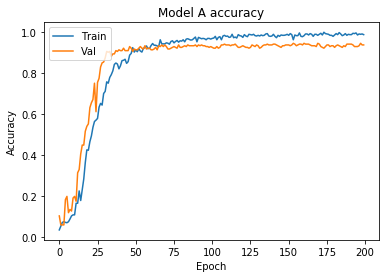

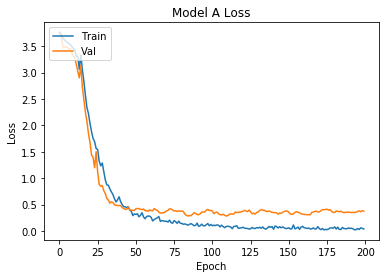

In [0]:
plt.plot(data_a.history['acc'])
plt.plot(data_a.history['val_acc'])
plt.title('Model A accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(data_a.history['loss'])
plt.plot(data_a.history['val_loss'])
plt.title('Model A Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


**Data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

datagen = ImageDataGenerator(featurewise_center=False,
                             featurewise_std_normalization=False,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10.)

datagen.fit(tr_signs)

# Train again
epochs = 30
cnn.fit_generator(datagen.flow(tr_signs, tr_labels, batch_size=150),
                    steps_per_epoch=tr_signs.shape[0],
                    epochs=epochs,
                    validation_data=(va_signs, va_labels),
                    callbacks=[LearningRateScheduler(lr_schedule),
                               ModelCheckpoint('model.h5', save_best_only=True)]
                    )

start = time()
loss, acc = cnn.evaluate(te_signs, te_labels, verbose=1)
end = time()
# print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Epoch 1/30
600/600 [==============================] - 807s 1s/step - loss: 1.4892 - acc: 0.5710 - val_loss: 0.3866 - val_acc: 0.9167
Epoch 2/30
600/600 [==============================] - 801s 1s/step - loss: 0.1678 - acc: 0.9467 - val_loss: 0.3167 - val_acc: 0.9524
Epoch 3/30
600/600 [==============================] - 801s 1s/step - loss: 0.0596 - acc: 0.9819 - val_loss: 0.3119 - val_acc: 0.9643
Epoch 4/30
600/600 [==============================] - 799s 1s/step - loss: 0.0346 - acc: 0.9896 - val_loss: 0.4621 - val_acc: 0.9444
Epoch 5/30
600/600 [==============================] - 801s 1s/step - loss: 0.0211 - acc: 0.9935 - val_loss: 0.2883 - val_acc: 0.9603
Epoch 6/30
600/600 [==============================] - 801s 1s/step - loss: 0.0191 - acc: 0.9943 - val_loss: 0.3037 - val_acc: 0.9524
Epoch 7/30
600/600 [==============================] - 800s 1s/step - loss: 0.0151 - acc: 0.9954 - val_loss: 0.3539 - val_acc: 0.9603
Epoch 8/30
600/600 [==============================] - 800s 1s/step - 

In [0]:
start = time()
loss, acc = cnn.evaluate(te_signs, te_labels, verbose=1)
end = time()
# print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

361/361 [==============================] - 0s 706us/step
Test loss: 0.17584015075313533 - Accuracy: 0.9806094182825484


**Majority vote**

In [0]:
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.engine import training
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average
from keras.losses import categorical_crossentropy
from keras.models import Model, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from typing import Tuple, List
import glob
import numpy as np
import os

input_shape = [224,224,3]
model_input = Input(shape=input_shape)

Model A


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

def model_a(model_input: Tensor) -> training.Model:

#Instantiate an empty model

# 1st Convolutional Layer
  cnn_a=(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding="valid")) (model_input)
  cnn_a=(Activation("relu")) (cnn_a)
# Max Pooling
  cnn_a=(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))(cnn_a)

# 2nd Convolutional Layer
  cnn_a=(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="valid"))(cnn_a)
  cnn_a=(Activation("relu"))(cnn_a)
# Max Pooling
  cnn_a=(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))(cnn_a)

# 3rd Convolutional Layer
  cnn_a=(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))(cnn_a)
  cnn_a=(Activation("relu"))(cnn_a)

# 4th Convolutional Layer
  cnn_a=(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))(cnn_a)
  cnn_a=(Activation("relu"))(cnn_a)

# Passing it to a Fully Connected layer
  cnn_a=(Flatten())(cnn_a)
# 1st Fully Connected Layer
  cnn_a=(Dense(512, input_shape=input_shape))(cnn_a)
  cnn_a=(Activation("relu"))(cnn_a)
# Add Dropout to prevent overfitting
  cnn_a=(Dropout(0.8))(cnn_a)

# Output Layer
  cnn_a=(Dense(num_classes))(cnn_a)
  cnn_a=(Activation("softmax"))(cnn_a)

  model = Model(model_input, cnn_a, name='model_a')

  return model



Model B

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras import optimizers


def model_b(model_input: Tensor) -> training.Model:

# 1st Convolutional Layer
  cnn_b=(Conv2D(filters=384, kernel_size=(11,11), strides=(4,4), padding="valid"))(model_input)
  cnn_b=(LeakyReLU(alpha=0.1))(cnn_b)
# Max Pooling
  cnn_b=(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))(cnn_b)

# 2nd Convolutional Layer
  cnn_b=(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="valid"))(cnn_b)
  cnn_b=(LeakyReLU(alpha=0.1))(cnn_b)
# Max Pooling
  cnn_b=(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))(cnn_b)

# 3rd Convolutional Layer
  cnn_b=(Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding="valid"))(cnn_b)
  cnn_b=(LeakyReLU(alpha=0.1))(cnn_b)

# 4th Convolutional Layer
  cnn_b=(Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding="valid"))(cnn_b)
  cnn_b=(LeakyReLU(alpha=0.1))(cnn_b)

# Passing it to a Fully Connected layer
  cnn_b=(Flatten())(cnn_b)
# 1st Fully Connected Layer
  cnn_b=(Dense(512, input_shape=input_shape))(cnn_b)
  cnn_b=(LeakyReLU(alpha=0.1))(cnn_b)
# Add Dropout to prevent overfitting
  cnn_b=(Dropout(0.8))(cnn_b)

# Output Layer
  cnn_b=(Dense(num_classes))(cnn_b)
  cnn_b=(Activation("softmax"))(cnn_b)

  model = Model(model_input, cnn_b, name='model_b')

  return model



Model C

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras import optimizers
def model_c(model_input: Tensor) -> training.Model:
 
# 1st Convolutional Layer
  cnn_c=(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding="valid"))(model_input)
  cnn_c=(LeakyReLU(alpha=0.1))(cnn_c)
# Max Pooling
  cnn_c=(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))(cnn_c)

# 2nd Convolutional Layer
  cnn_c=(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="valid"))(cnn_c)
  cnn_c=(LeakyReLU(alpha=0.1))(cnn_c)
# Max Pooling
  cnn_c=(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))(cnn_c)

# 3rd Convolutional Layer
  cnn_c=(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))(cnn_c)
  cnn_c=(LeakyReLU(alpha=0.1))(cnn_c)

# Passing it to a Fully Connected layer
  cnn_c=(Flatten())(cnn_c)
# 1st Fully Connected Layer
  cnn_c=(Dense(1024, input_shape=input_shape))(cnn_c)
  cnn_c=(LeakyReLU(alpha=0.1))(cnn_c)
# Add Dropout to prevent overfitting
  cnn_c=(Dropout(0.8))(cnn_c)

# Output Layer
  cnn_c=(Dense(num_classes))(cnn_c)
  cnn_c=(Activation("softmax"))(cnn_c)

  model = Model(model_input, cnn_c, name='model_c')

  return model



In [0]:
NUM_EPOCHS = 200
BATCH_SIZE = 150
from keras.optimizers import SGD
lr = 0.0075
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)


def compile_and_train(model: training.Model, num_epochs: int) -> Tuple [History, str]: 
    
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

    filepath = '/content/weights/' + model.name + '.{epoch:02d}-{loss:.2f}.hdf5'

    checkpoint = ModelCheckpoint(filepath, monitor='metrics', verbose=1, save_weights_only=True, save_best_only=True, mode='auto', period=1)
    
    tensor_board = TensorBoard(log_dir='logs/', histogram_freq=0, batch_size=32)

    history = model.fit(tr_signs, tr_labels,
               batch_size=BATCH_SIZE,
               epochs=NUM_EPOCHS,
               verbose=2,
               validation_data=(va_signs, va_labels))
    
    return history

In [0]:
cnn_a = model_a(model_input)
cnn_a.summary()
cnn_b = model_b(model_input)
cnn_b.summary()
cnn_c = model_c(model_input)
cnn_c.summary()

compile_and_train(cnn_a, NUM_EPOCHS)
compile_and_train(cnn_b, NUM_EPOCHS)
compile_and_train(cnn_c, NUM_EPOCHS)

In [0]:
from keras.optimizers import SGD
cnn_a_2 = model_a(model_input)
cnn_b_2 = model_b(model_input)
cnn_c_2 = model_c(model_input)

models = [cnn_a, cnn_b, cnn_c]

def ensemble(models: List [training.Model], model_input: Tensor) -> training.Model:
    
    outputs = [model.outputs[0] for model in models]
    y = Average()(outputs)
    
    model = Model(model_input, y, name='ensemble')
    
    return model

ensemble_model = ensemble(models, model_input)
#compile_and_train(ensemble_model,model_input)
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
ensemble_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [0]:
from time import time
def evaluate_accuracy(model: training.Model) -> np.float64:    
  start = time()
  loss, acc = model.evaluate(te_signs, te_labels, verbose=1)
  end = time()  
  print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))
 
  return acc

# CIFAR 100 Dataset

In [0]:
from keras.datasets import cifar100
(_x_train, _y_train), (_x_test, _y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 11s 0us/step


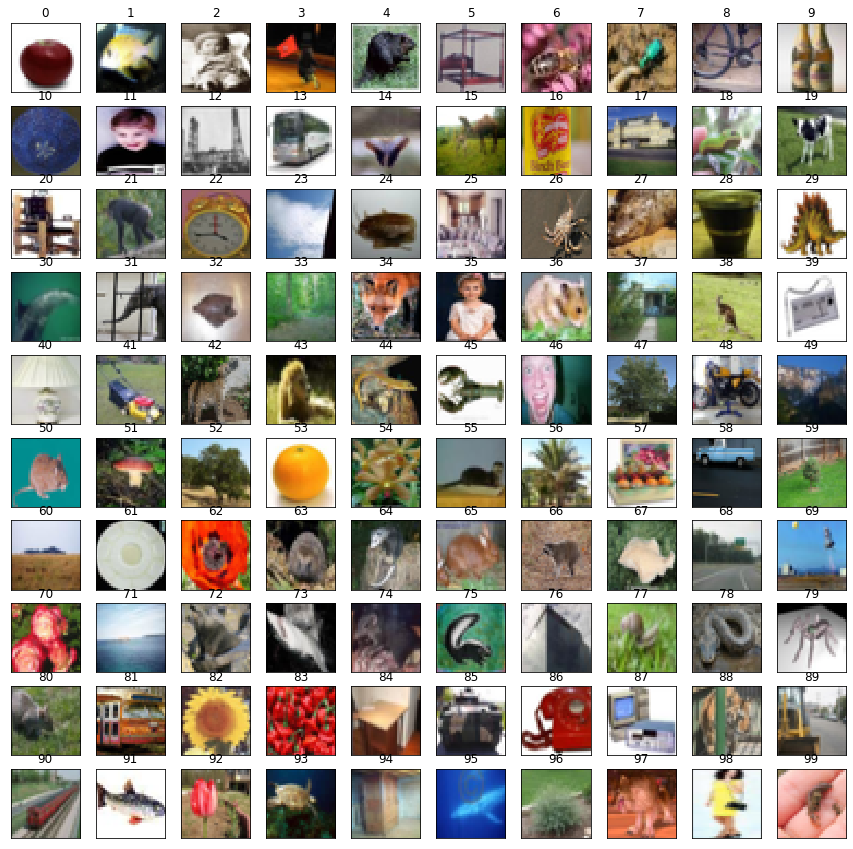

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(_y_train)
num_classes = len(class_names)

fig, axes = plt.subplots(10, 10,figsize=(15,15))
for i in range(num_classes):
    ax = axes.flatten()[i]
    indices = np.where(np.isin(_y_train, class_names[i]))[0]
    ax.imshow(_x_train[int(np.random.choice(indices, 1))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(i)
plt.show()

In [0]:
# Data pre-processing
x_val = _x_train[40000:]
y_val = _y_train[40000:]
x_train = _x_train[:40000]
y_train = _y_train[:40000]
x_test = _x_test
y_test = _y_test

# Normalize the images to be values in range [0, 1]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

from keras.utils import np_utils
# Converts a class vector (integers) to binary class matrix
tr_labels = np_utils.to_categorical(y_train, num_classes)
va_labels = np_utils.to_categorical(y_val, num_classes)
te_labels = np_utils.to_categorical(y_test, num_classes)

CIFAR_SIZE = (32, 32)

In [0]:
# create sequential model
cnn = Sequential()
cnn.add(ZeroPadding2D(4, input_shape=x_train.shape[1:]))

# layer 1
cnn.add(Conv2D(32, (3, 3), padding='same'))
cnn.add(Activation('elu'))  

# layer 2
cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('elu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))

# layer 3
cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('elu'))


# layer 4
cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('elu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))

# layer 5
cnn.add(Conv2D(128, (3, 3), padding='same'))
cnn.add(Activation('elu'))

# layer 6
cnn.add(Conv2D(128, (3, 3)))
cnn.add(Conv2D(128, (1, 1)))
cnn.add(Activation('elu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))

# layer 7
cnn.add(Flatten())
cnn.add(Dense(500))
cnn.add(Activation('elu'))
cnn.add(Dropout(0.2))

# output
cnn.add(Dense(num_classes))
cnn.add(Activation('softmax'))

opt = optimizers.Adam(lr=0.0001)

cnn.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

cnn.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
activation_52 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
activation_53 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 2, 2, 384)       

In [0]:
# train_steps = int(len(x_train) / 16)
# valid_steps = int(len(x_val) / 16)

# datagen = ImageDataGenerator(width_shift_range=0.1, 
#                              height_shift_range=0.1, 
#                              shear_range=0.1, 
#                              zoom_range=0.1, fill_mode='nearest')


# data = cnn.fit_generator(datagen.flow(x_train, tr_labels, batch_size=16), 
#                          epochs=20, 
#                          steps_per_epoch=train_steps, 
#                          verbose=2, 
#                          validation_data=(x_val, va_labels), 
#                          validation_steps=valid_steps)

from time import time
data = cnn.fit(x_train, 
               tr_labels, 
               batch_size=16, 
               epochs=25, verbose=2, validation_data=(x_val, va_labels))

start = time()
loss, acc = cnn.evaluate(x_test, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 22s - loss: 4.5035 - acc: 0.0192 - val_loss: 4.2004 - val_acc: 0.0430
Epoch 2/20
 - 21s - loss: 4.0978 - acc: 0.0571 - val_loss: 3.8895 - val_acc: 0.0910
Epoch 3/20
 - 21s - loss: 3.8263 - acc: 0.1012 - val_loss: 3.6013 - val_acc: 0.1470
Epoch 4/20
 - 21s - loss: 3.6289 - acc: 0.1390 - val_loss: 3.5062 - val_acc: 0.1618
Epoch 5/20
 - 21s - loss: 3.5234 - acc: 0.1617 - val_loss: 3.4862 - val_acc: 0.1774
Epoch 6/20
 - 22s - loss: 3.4593 - acc: 0.1754 - val_loss: 3.3937 - val_acc: 0.1953
Epoch 7/20
 - 21s - loss: 3.3741 - acc: 0.1956 - val_loss: 3.3713 - val_acc: 0.2041
Epoch 8/20
 - 21s - loss: 3.3432 - acc: 0.2054 - val_loss: 3.4260 - val_acc: 0.1925
Epoch 9/20
 - 21s - loss: 3.2920 - acc: 0.2177 - val_loss: 3.3895 - val_acc: 0.2044
Epoch 10/20
 - 21s - loss: 3.2752 - acc: 0.2225 - val_loss: 3.4585 - val_acc: 0.1973
Epoch 11/20
 - 21s - loss: 3.2571 - acc: 0.2261 - val_loss: 3.3803 - val_acc: 0.2170
Epoch 12/20
 - 21s - los

In [0]:
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Mean Log Loss')
plt.ylabel('Log Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

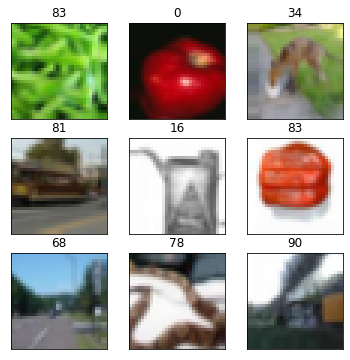

In [0]:
import cv2

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             shear_range=0.1, 
                             zoom_range=0.1, fill_mode='nearest')

datagen.fit(x_train, augment=True)


In [0]:

train_steps = int(len(x_train) / 16)
valid_steps = int(len(x_val) / 16)

data = cnn.fit_generator(datagen.flow(x_train, tr_labels, batch_size=16), 
                         epochs=20, 
                         steps_per_epoch=train_steps, 
                         verbose=2, 
                         validation_data=(x_val, va_labels), 
                         validation_steps=valid_steps)

In [0]:
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Mean Log Loss')
plt.ylabel('Log Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()